In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))
#print(sys.path)
import util.items as items

from sklearn.preprocessing import StandardScaler

In [239]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [346]:
item = "Lobster"

In [347]:
similar = items.getSimilarItems(item)
print(similar)
similar = [a[0] for a in similar]
similar = similar[:]
print(similar)

[('Lobster_pot', 9), ('Anchovies', 6), ('Pike', 6), ('Tuna', 6), ('Trout', 6)]
['Lobster_pot', 'Anchovies', 'Pike', 'Tuna', 'Trout']


In [348]:
items.getPrices(item)[-10:]

[167, 166, 167, 166, 166, 169, 174, 175, 177, 179]

In [349]:
items.getInfo(item)

{'members': 'False',
 'edible': 'True',
 'update': '/w/Update:New_fishing_skill_and_more_cooking',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Lobster.png',
 'lowAlch': '28',
 'examine': 'This looks tricky to eat',
 'highAlch': '42',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'False',
 'weight': '0.35',
 'released': '11 June 2001',
 'storeCurrency': 'N/A',
 'name': 'Lobster',
 'alchable': 'True',
 'exchangePrice': '166',
 'tradeable': 'True',
 'buyLimit': '6000',
 'noteable': 'True',
 'stackable': 'False'}

In [452]:
def sma(data, window):
        """
        Calculates Simple Moving Average
        http://fxtrade.oanda.com/learn/forex-indicators/simple-moving-average
        """
        if len(data) < window:
            return None
        return sum(data[-window:]) / float(window)


def ema(values, window):
    """ Numpy implementation of EMA
    """
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return a

1291 1311 1291 1291 350


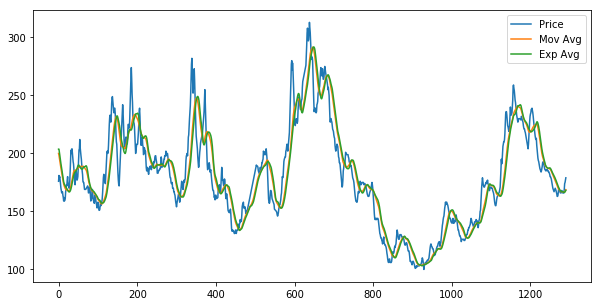

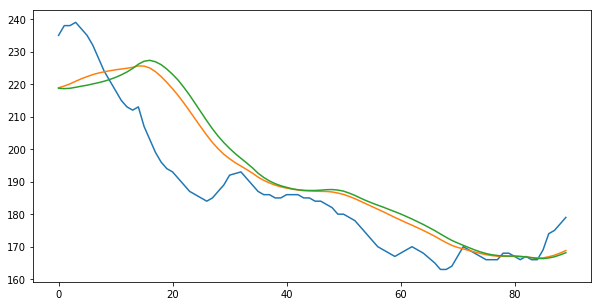

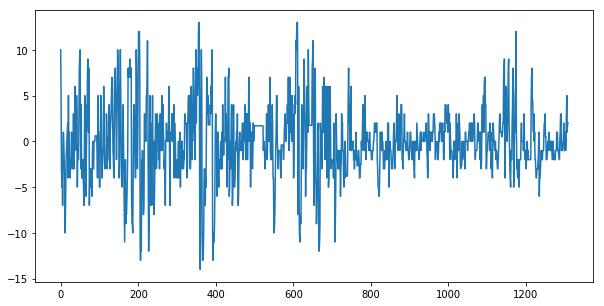

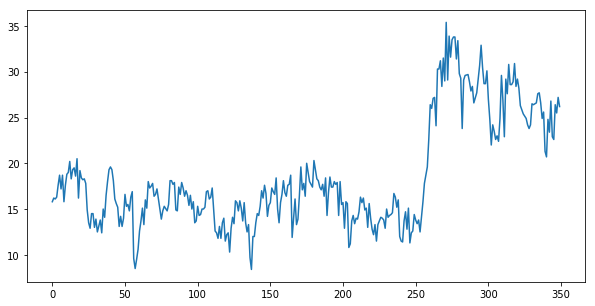

In [477]:
ma = 21
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
movAvg = items.movingAverage(item,ma)
expAvg = ema(prices,ma)[-1*len(movAvg):]
quant = items.getQuants(item)
print(len(movAvg),len(prices),len(movAvg),len(expAvg),len(quant))
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(prices[-1*len(movAvg):],label='Price')
plt.plot(movAvg,label='Mov Avg')
plt.plot(expAvg,label='Exp Avg')
plt.legend()
plt.show()
plt.plot(prices[-90:])
plt.plot(movAvg[-90:])
plt.plot(expAvg[-90:])
plt.show()
plt.plot(changes)
plt.show()
plt.plot(quant)
plt.show()

1300


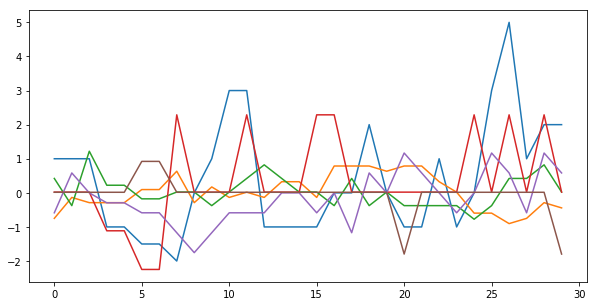

In [478]:
scaler = StandardScaler()
simPrices = [scaler.fit_transform(np.array(items.getPrices(a)).reshape(-1, 1)).reshape(len(items.getPrices(a)),) for a in similar]
simChanges = [scaler.fit_transform(np.array(items.getPriceChanges(a)).reshape(-1, 1)).reshape(len(items.getPriceChanges(a)),) for a in similar]
minLen =  len(changes)
for i in range(len(simChanges)):
    if len(simChanges[i])<minLen:
        minLen = len(simChanges[i])
print(minLen)
plt.plot(changes[-30:])
for i in range(len(simChanges)):
    plt.plot(simChanges[i][-1*30:])
plt.show()

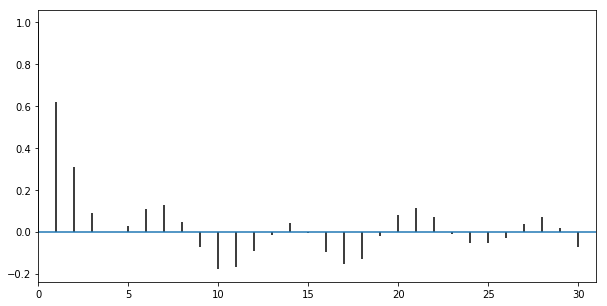

In [479]:
plt.acorr(changes,maxlags=30)
plt.xlim(0,31)
plt.show()

In [480]:
def minMax(data):
    d = []
    ma = max(data)
    mi = min(data)
    for i in range(len(data)):
        d.append((data[i]-mi)/(ma-mi))
    return d

def diffArea(data1,data2):
    diff = 0
    arr = []
    for i in range(len(data1)):
        d = data1[i]-data2[i]
        if np.sign(d)!=np.sign(diff):
            diff = 0
        diff+=d
        arr.append(diff)
    return arr

1291 1291


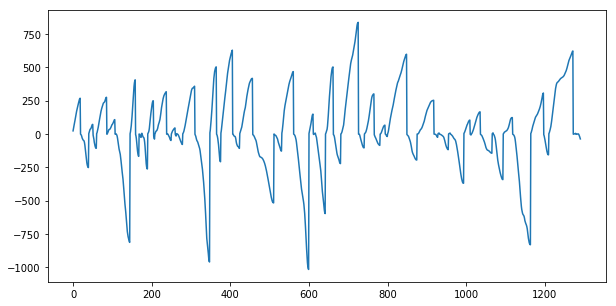

In [481]:
print(len(movAvg),len(prices[-1*len(movAvg):]))
diffA = diffArea(movAvg,prices[-1*len(movAvg):])
plt.plot(diffA)
plt.show()

[ 2.59582826  1.30127404 -0.77001271 -1.28783439 -1.02892355]


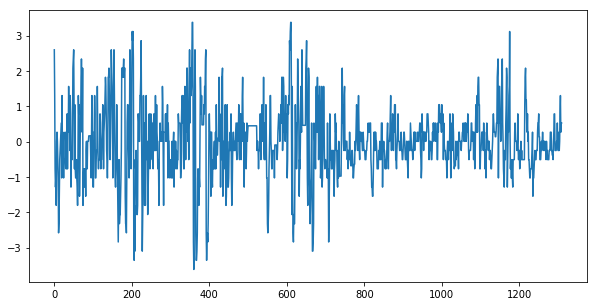

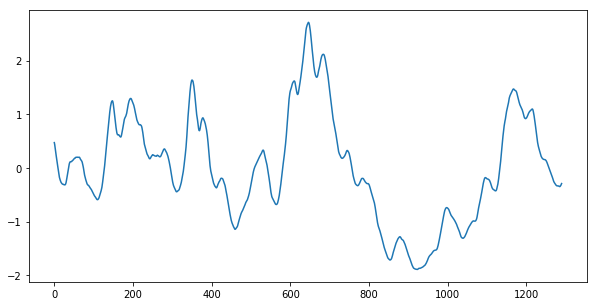

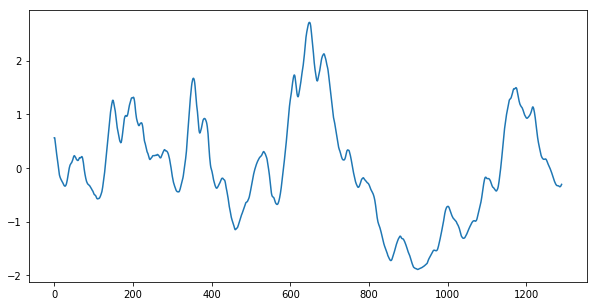

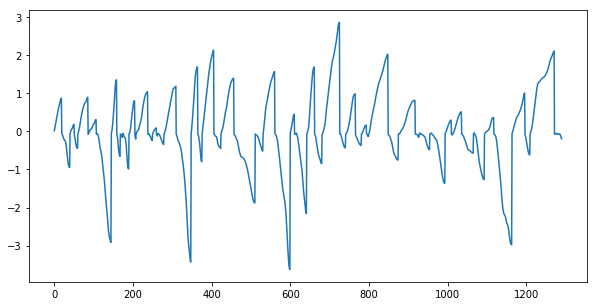

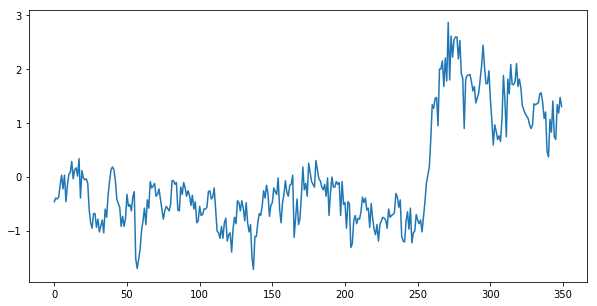

1310 1291 1291 1291 350


In [482]:
s_changes = scaler.fit_transform(np.array(changes).reshape(-1, 1)).reshape(len(changes),)
print(s_changes[0:5])
plt.plot(s_changes)
plt.show()
s_movAvg = scaler.fit_transform(np.array(movAvg).reshape(-1, 1)).reshape(len(movAvg),)
plt.plot(s_movAvg)
plt.show()
s_expAvg = scaler.fit_transform(np.array(expAvg).reshape(-1, 1)).reshape(len(expAvg),)
plt.plot(s_expAvg)
plt.show()
s_diffA = scaler.fit_transform(np.array(diffA).reshape(-1,1)).reshape(len(diffA),)
plt.plot(s_diffA)
plt.show()
if len(quant)!=0:
    s_quant = scaler.fit_transform(np.array(quant).reshape(-1,1)).reshape(len(quant),)
    plt.plot(s_quant)
    plt.show()
print(len(s_changes),len(s_movAvg),len(s_diffA),len(s_expAvg),len(s_quant))

In [483]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0
       

In [484]:
x = []
y = []
p = []
size = 10
for i in range(-1*len(s_expAvg),-1*size,1):
    x.append(np.concatenate((s_changes[i:int(i+size/2)],s_expAvg[i:int(i+size/2)])))
    y.append(classify(s_changes[i+size]))
    p.append(prices[i+size])
print(x[1],y[0])
print(len(x[0]),len(x[-1]))
print(len(x),len(y),len(p))
#y = keras.utils.to_categorical(y, num_classes=2)

[ 1.30127404 -0.51110186  0.26563067 -0.77001271 -1.02892355  0.56174166
  0.50797197  0.44249545  0.37741541  0.31592807] 1
10 10
1281 1281 1281


In [357]:
x = []
y = []
p = []
size = 14
for i in range(-1*len(s_changes),-1*size,1):
    x.append(s_changes[i:i+size])
    y.append(classify(s_changes[i+size]))
    p.append(prices[i+size])
print(x[1],y[0])
print(len(x[0]),len(x[-1]))
print(len(x),len(y),len(p))
#y = keras.utils.to_categorical(y, num_classes=2)

[ 1.30127404 -0.77001271 -1.28783439 -1.02892355 -1.80565608  0.00671982
  0.26563067  0.00671982 -0.51110186 -1.02892355 -2.58238861 -2.32347777
 -1.28783439 -0.51110186] 0
14 14
1296 1296 1296


In [293]:
x = []
y = []
p = []
size = 10
for i in range(-1*minLen,-1*size,1):
    x.append(np.concatenate((s_changes[i:int(i+size/2)],[simChanges[0][i],simChanges[1][i],simChanges[2][i],simChanges[3][i],simChanges[4][i]])))
    y.append(classify(s_changes[i+size]))
    p.append(prices[i+size])
print(x[1],y[0])
print(len(x[0]),len(x[-1]))
print(len(x),len(y),len(p))
#y = keras.utils.to_categorical(y, num_classes=2)

[-2.45647857 -1.78004454  0.02377955  0.47473557  2.27855965 -0.00859455
  0.03781092  0.51826161 -0.47967574  0.16809438] 0
10 10
1301 1301 1301


1024 1024 128 128 129 129 129
10 [-1.02892355  1.30127404 -0.51110186  0.26563067 -0.77001271  0.56174166
  0.56174166  0.50797197  0.44249545  0.37741541]
1
10 [0.26563067 0.26563067 1.30127404 1.56018488 3.11364995 1.07085012
 1.10592166 1.146159   1.1886511  1.23178062]
0


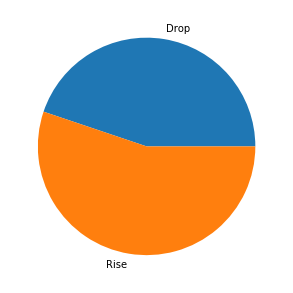

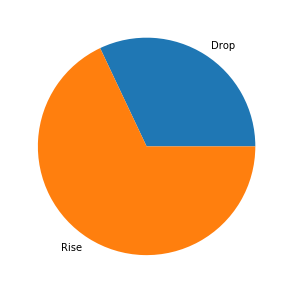

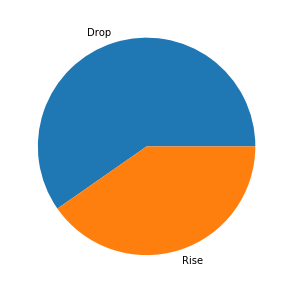

In [485]:
s1 = int(len(y)*.8)
s2  =int(len(y)*.9)
x_train = np.array(x[:s1])
y_train = np.array(y[:s1])
x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
p_val = np.array(p[s1:s2])
x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])
print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])
plt.pie([list(y_train).count(0)/len(y_train),list(y_train).count(1)/len(y_train)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_val).count(0)/len(y_val),list(y_val).count(1)/len(y_val)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_test).count(0)/len(y_test),list(y_test).count(1)/len(y_test)],labels=['Drop','Rise'])
plt.show()

In [490]:
model = Sequential()
model.add(Dense(int(size*3), input_dim=size, activation='relu'))
#model.add(Dense(int(size*2), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 30)                330       
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 31        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None


In [491]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=50,
            batch_size=4)

Train on 1024 samples, validate on 128 samples
Epoch 1/50
1024/1024 [==============================] - 4s 4ms/step - loss: 0.6874 - acc: 0.5615 - val_loss: 0.6457 - val_acc: 0.6250
Epoch 2/50
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6734 - acc: 0.5820 - val_loss: 0.6524 - val_acc: 0.6328
Epoch 3/50
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6708 - acc: 0.5879 - val_loss: 0.6583 - val_acc: 0.6172
Epoch 4/50
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6676 - acc: 0.5947 - val_loss: 0.6727 - val_acc: 0.6094
Epoch 5/50
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6670 - acc: 0.5938 - val_loss: 0.6640 - val_acc: 0.6094
Epoch 6/50
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6661 - acc: 0.5977 - val_loss: 0.6555 - val_acc: 0.6250
Epoch 7/50
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6644 - acc: 0.5996 - val_loss: 0.6521 - val_acc: 0.6094
Epoch 8/50
1024

In [488]:
score = model.evaluate(x_test, y_test, batch_size=1)
print(model.metrics_names)
print(score)

y_pred = model.predict(x_test)
true_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]>.5])
false_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]<.5])
true_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]<.5])
false_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]>.5])
print(true_pos,false_pos,true_neg,false_neg,true_pos+true_neg+false_pos+false_neg)
print('Accuracy: ', (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg))
prec = (true_pos)/(true_pos+false_pos)
print('Precision: ', prec)
recall = (true_pos)/(true_pos+false_neg)
print('Recall: ', recall)
print('F1: ', (2*recall*prec)/(recall+prec))

129/129 [==============================] - 0s 2ms/step
['loss', 'acc']
[0.6760463804699653, 0.5426356589147286]
22 29 48 30 129
Accuracy:  0.5426356589147286
Precision:  0.43137254901960786
Recall:  0.4230769230769231
F1:  0.4271844660194175


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


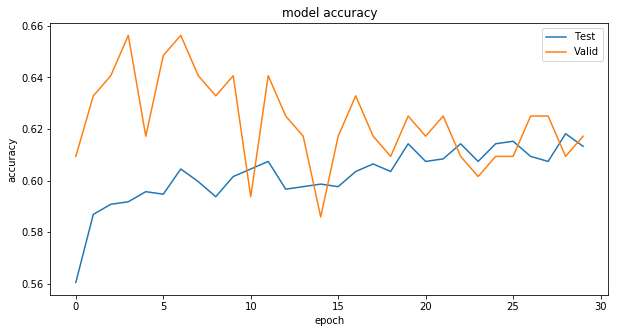

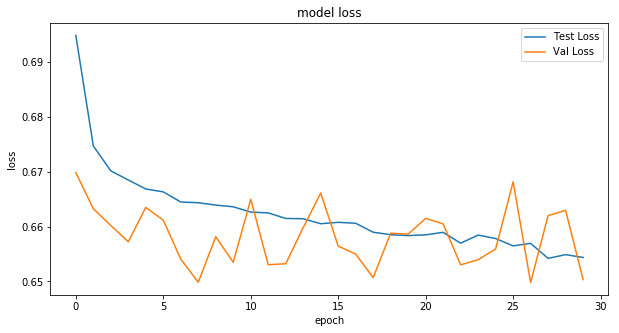

In [489]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [436]:
print(y_test[:20])
print(p_test[:20])

[0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0]
[240. 235. 233. 231. 229. 227. 228. 230. 230. 230. 230. 230. 229. 229.
 232. 231. 229. 228. 227. 224.]


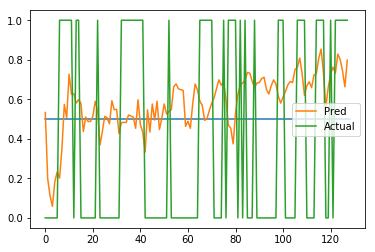

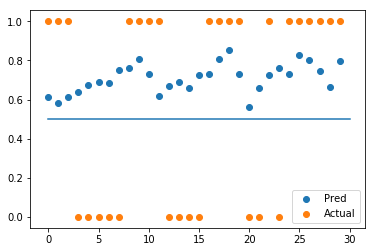

In [437]:
y_pred = model.predict(x_test)
plt.plot([0, len(y_pred)], [.5, .5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot([0, len(y_test[-30:])], [.5, .5])
plt.scatter(range(len(y_test[-30:])),y_pred[-30:],label='Pred')
plt.scatter(range(len(y_test[-30:])),y_test[-30:],label='Actual')
#plt.plot(y_test[-31:],label='Actual-1')
plt.legend()
plt.show()

In [409]:
import util.trading_systems as ts

bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test),len(y_test),len(p_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
mpBestNoT = [[-100]] * len(budgets)
ppBest = [[-100]] * len(budgets)
bhBest = [[-100]] * len(budgets)
perBest = [[-100]] * len(budgets)

yp = model.predict(x_val)
for b in range(len(budgets)):
    t = 0
    for i in range(10):
        mp = ts.modelProfit(t,yp,p_val,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        t += .02

yp = model.predict(x_test)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    ppBest[b] = ts.perfectProfit(y_test,p_test,bl,budgets[b])
    perBest[b] = ts.persistanceProfit(y_test,p_test,bl,budgets[b])
    mpBest[b] = (ts.modelProfit(mpBest[b][1],yp,p_test,bl,budgets[b]),mpBest[b][1])
    mpBestNoT[b] = ts.modelProfit(0,yp,p_test,bl,budgets[b])

130 130 130
100000
1000000
10000000
100000000
1000000000


In [410]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tModel No T\n\t',mpBestNoT[b][-1],0)
    print('\tPersistance\n\t',perBest[b][-1])
    print('\tPerfect\n\t',ppBest[b][-1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 0.11996 0
	Model No T
	 0.11996 0
	Persistance
	 0.12445
	Perfect
	 0.46828
	Buy and Hold
	 -0.27202
1000000
	Model
	 0.11935 0
	Model No T
	 0.11935 0
	Persistance
	 0.121054
	Perfect
	 0.463657
	Buy and Hold
	 -0.272355
10000000
	Model
	 0.0195564 0
	Model No T
	 0.0195564 0
	Persistance
	 0.0140133
	Perfect
	 0.14717
	Buy and Hold
	 -0.0402
100000000
	Model
	 0.0012 0
	Model No T
	 0.0012 0
	Persistance
	 0.0009
	Perfect
	 0.01494
	Buy and Hold
	 -0.00402
1000000000
	Model
	 0.00012 0
	Model No T
	 0.00012 0
	Persistance
	 9e-05
	Perfect
	 0.001494
	Buy and Hold
	 -0.000402


130 130 129 130


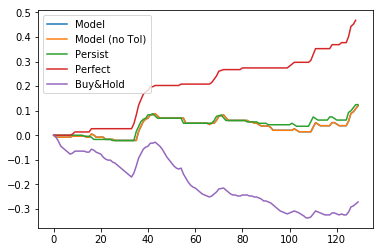

130 130 129 130


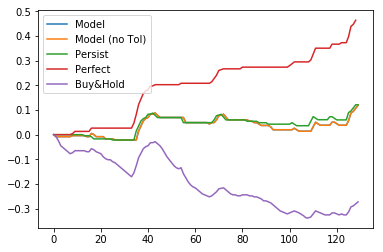

130 130 129 130


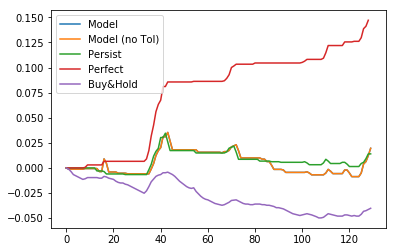

130 130 129 130


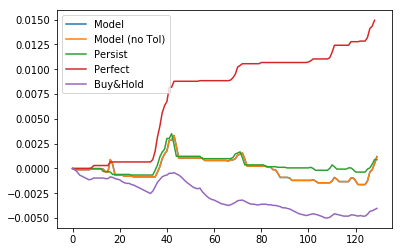

130 130 129 130


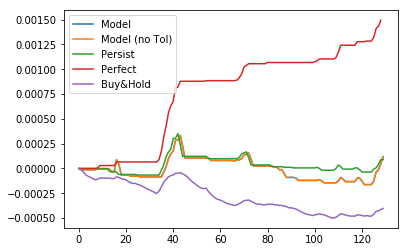

In [411]:
for b in range(len(budgets)):
    print(len(mpBest[b][0]),len(perBest[b]),len(ppBest[b]),len(bhBest[b]))
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(mpBestNoT[b],label='Model (no Tol)')
    plt.plot(perBest[b],label='Persist')
    plt.plot(ppBest[b],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()